In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
from statistics import mean

In [2]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()
df.drop("bmi", axis=1, inplace=True)

<ipython-input-2-2ed82b6d6a40>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("bmi", axis=1, inplace=True)


In [3]:
## chargement et affichage des données
#data = pd.read_csv('../data.csv')
#def classify_bmi(row):
#    if row["bmi"] < 18.5:
#        return "underweight"
#    elif row["bmi"] < 25:
#        return "normal"
#    elif row["bmi"] < 30:
#        return "overweight"
#    elif row["bmi"] < 35:
#        return "obese"
#    else:
#        return "severely obese"
#data["bmi_class"] = data.apply(classify_bmi, axis=1)
## Remove duplicates from the 'data' DataFrame
#df = data.drop_duplicates()
## Drop Bmi
#df.drop("bmi", axis=1, inplace=True)

In [4]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]
# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])
metrics = []

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test




In [6]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)
print(f"len(X_train) : {len(X_train)}")
index_to_be_removed = my_functions.get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=preprocessor)
X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)
print(f"New len(X_train) : {len(X_train)}")

len(X_train) : 1069
New len(X_train) : 1025


LR with Kfold CV (Polynomial degree=1)

[0.77825014 0.83603115 0.83206251 0.85968684 0.78594934]
0.8183959957808558
CV Accuracy: 0.82 (+/- 0.03)
R2: 0.7782
MAE: 3901.322
RMSE: 5160.4186
Model_score_test: 5160.4186
Model_score_training: 5160.4186


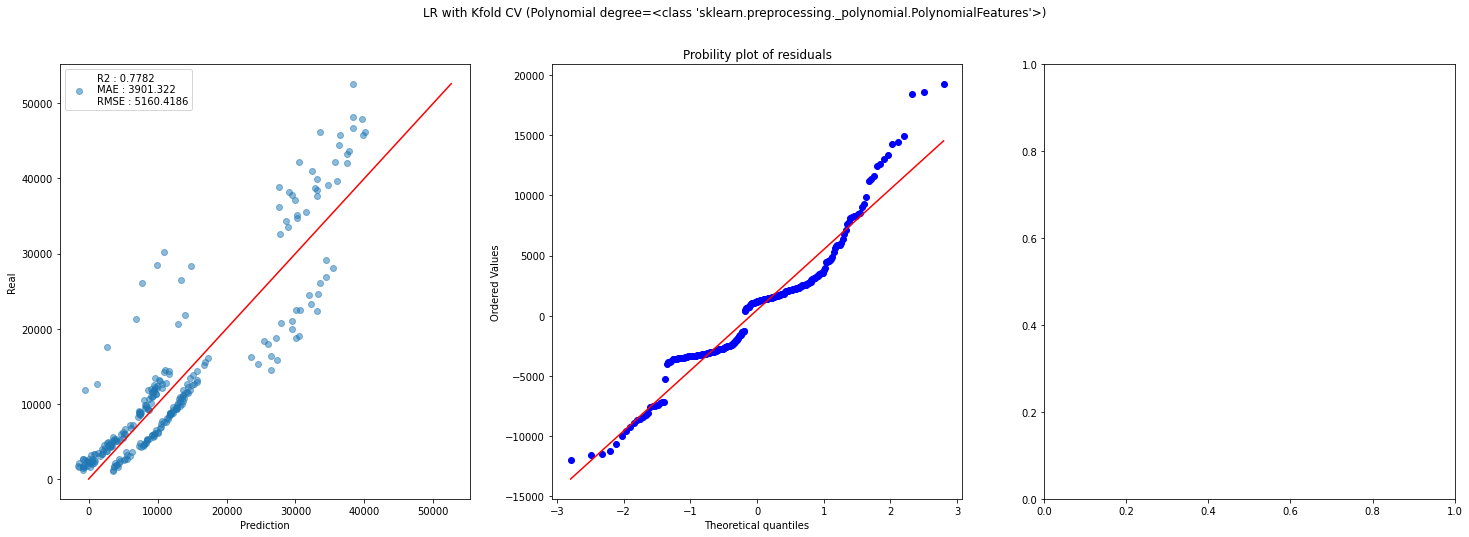

In [7]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std = my_functions.LR_with_CV(PolynomialFeatures_degree = 1, 
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 
metrics.append(["LR with Kfold CV (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])



LR with Kfold CV (Polynomial degree=2)

[0.90217248 0.91859345 0.9379779  0.95898871 0.88870144]
0.9212867949114871
CV Accuracy: 0.92 (+/- 0.03)
R2: 0.9094
MAE: 1594.3093
RMSE: 3440.143
Model_score_test: 3440.143
Model_score_training: 3440.143


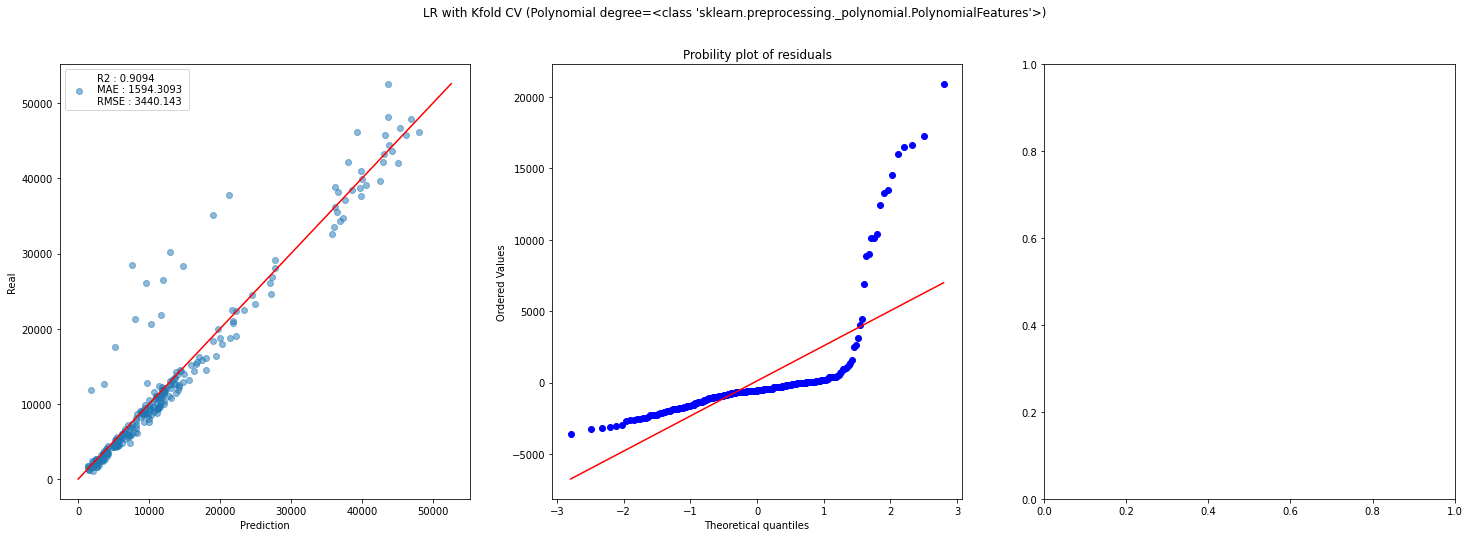

In [8]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std = my_functions.LR_with_CV(PolynomialFeatures_degree = 2, 
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 
metrics.append(["LR with Kfold CV (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std)])

In [9]:
################################
################################
#
# Get best Hypermarameters
#
################################
################################


#my_functions.get_best_params(
#    PolynomialFeatures_degree = 2,  
#    model=Lasso(max_iter=100000, 
#    tol=0.0001,
#    random_state=42, 
#    selection='cyclic'),   
#    param_grid= {'lasso__alpha': np.linspace(30,40,200)}, 
#    preprocessor = preprocessor, 
#    X_train = X_train, 
#    y_train = y_train)


LASSO with PolynomialFeatures(degree=1)

Lasso best alpha =  39.4321608040201
time to find best alpha : 1min 10.6s
[0.78170567 0.83679644 0.83265739 0.85861518 0.78668375]
0.8192916869748313
CV Accuracy: 0.82 (+/- 0.03)
Lasso Score with PolynomialFeatures(degree=<class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>) : 0.8159298738035056


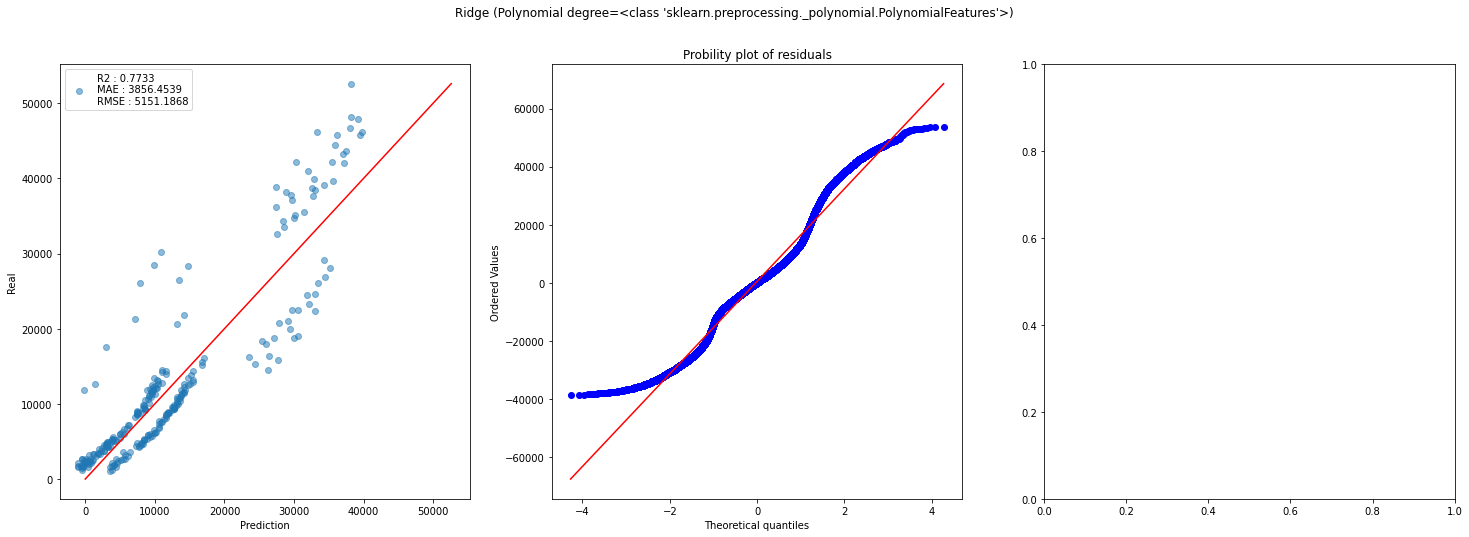

['LASSO (Polynomial degree=1)', 0.7733, 3856.4539218864243, 5151.1868208704145, 0.8159298738035056, 0.8273267128773935, '0.8193 (+/- 0.03)', 'Best_alpha : 39.432']


In [10]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 1, Best_alpha= 39.4321608040201,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 


metrics.append(["LASSO (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, 
                Model_score_training, "%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])
print(metrics[2])

LASSO with PolynomialFeatures(degree=2)

Lasso best alpha =  39.4321608040201
time to find best alpha : 1min 10.6s
[0.78118464 0.83661631 0.83265118 0.85899302 0.78679118]
0.8192472667275345
CV Accuracy: 0.82 (+/- 0.03)
Lasso Score with PolynomialFeatures(degree=<class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>) : 0.8157976554183228


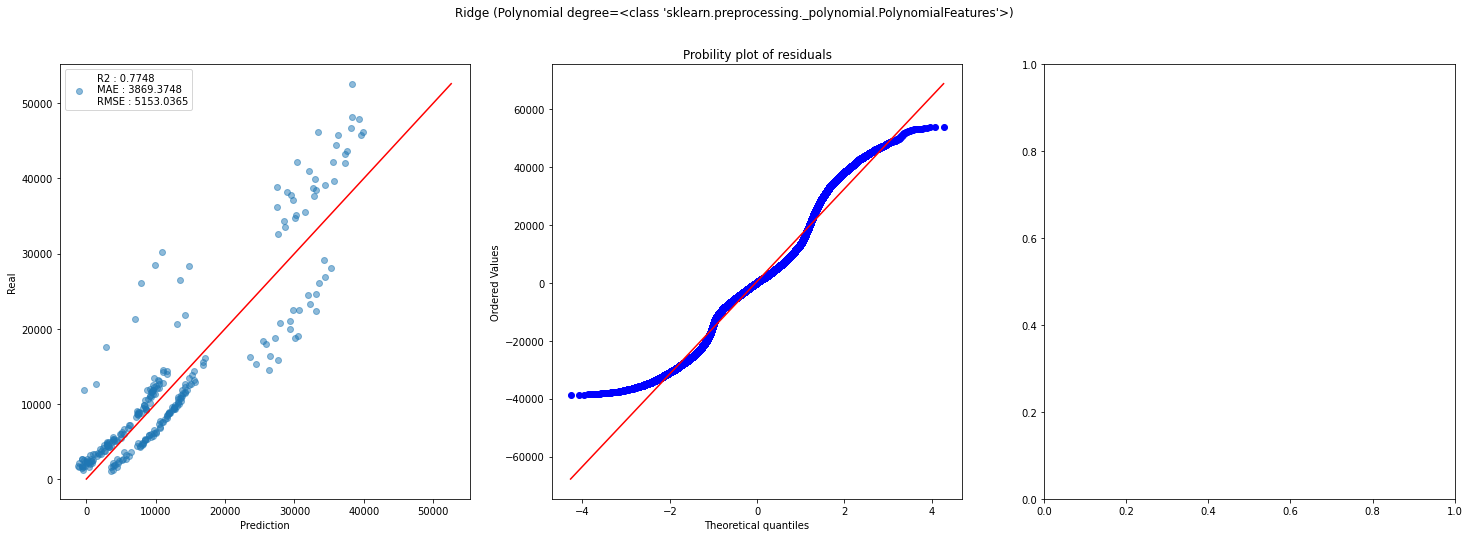

['LASSO (Polynomial degree=2)', 0.7748, 3869.374765884452, 5153.036548893171, 0.8157976554183228, 0.8274735726462923, '0.8192 (+/- 0.03)', 'Best_alpha : 27.94']


In [11]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha = my_functions.LASSO_with_CV(PolynomialFeatures_degree = 2, Best_alpha=  27.939698492462313,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 

metrics.append(["LASSO (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[3])

In [12]:
#best = my_functions.get_best_params(PolynomialFeatures_degree = 1,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(1,3,200)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)
#best

Ridge with PolynomialFeatures(degree=1)

Ridge best alpha =  39.4321608040201
time to find best alpha : 1min 10.6s
[0.77880882 0.8357436  0.83232941 0.85904118 0.78639901]
0.8184644051550412
CV Accuracy: 0.82 (+/- 0.03)
Ridge Score with PolynomialFeatures(degree=<class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>) : 0.8153189468560647


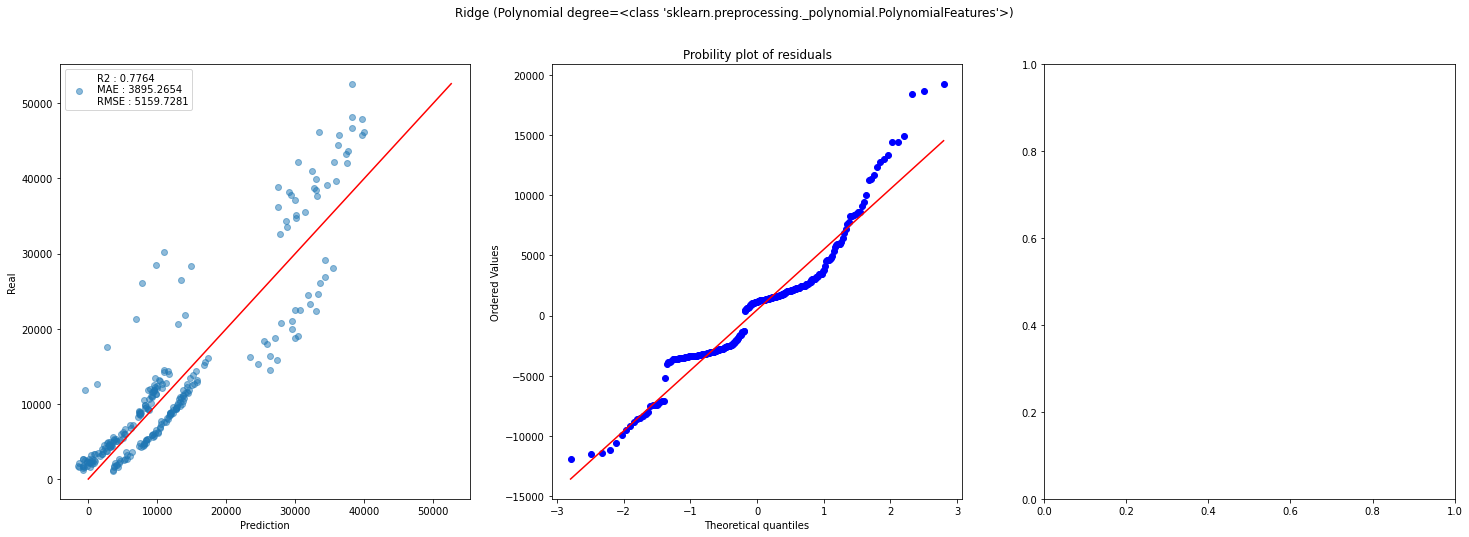

['Ridg (Polynomial degree=1)', 0.7764, 3895.2653812017124, 5159.728108951451, 0.8153189468560647, 0.8276309128223397, '0.8185 (+/- 0.03)', 'Best_alpha : 1.462']


In [13]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha = my_functions.Ridg_with_CV(PolynomialFeatures_degree = 1, Best_alpha=  1.4623115577889447,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 

metrics.append(["Ridg (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[4])

Ridge with PolynomialFeatures(degree=2)

Ridge best alpha =  39.4321608040201
time to find best alpha : 1min 10.6s
[0.77878685 0.83575623 0.83231951 0.85906861 0.78638154]
0.8184625465073826
CV Accuracy: 0.82 (+/- 0.03)
Ridge Score with PolynomialFeatures(degree=<class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>) : 0.8153174973169515


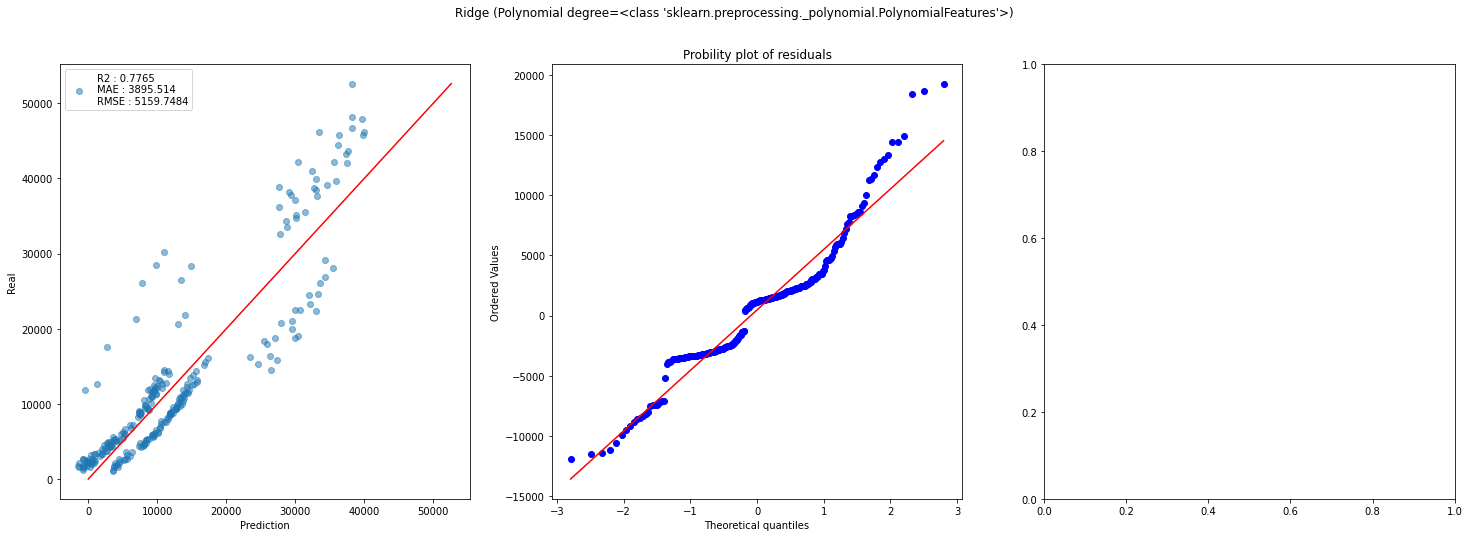

['Ridg (Polynomial degree=2)', 0.7765, 3895.5139702152055, 5159.74835795075, 0.8153174973169515, 0.8276321079037585, '0.8185 (+/- 0.03)', 'Best_alpha : 1.402']


In [14]:
R2, MAE, RMSE, Model_score_test, Model_score_training, scores_mean, scores_std, Best_alpha = my_functions.Ridg_with_CV(PolynomialFeatures_degree = 2, Best_alpha=  1.4020100502512562,
                X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test, 
                preprocessor = preprocessor, shuffle=True, random_state=42) 

metrics.append(["Ridg (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.4f (+/- %0.2f)" % (scores_mean, scores_std), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[5])

In [15]:

df_result = pd.DataFrame()
df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy", 'HyperParamter']).sort_values(['CV Accuracy'] , ascending=False, ignore_index=True).set_index('Model')
#df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy"]).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
df_result

,R2,MAE,RMSE,Score (test),Score (trainging),CV Accuracy,HyperParamter
Model,,,,,,,
LR with Kfold CV (Polynomial degree=2),0.9094,1594.309307,3440.143045,0.917904,0.931104,0.9213 (+/- 0.03),None
LASSO (Polynomial degree=1),0.7733,3856.453922,5151.186821,0.815930,0.827327,0.8193 (+/- 0.03),Best_alpha : 39.432
LASSO (Polynomial degree=2),0.7748,3869.374766,5153.036549,0.815798,0.827474,0.8192 (+/- 0.03),Best_alpha : 27.94
Ridg (Polynomial degree=1),0.7764,3895.265381,5159.728109,0.815319,0.827631,0.8185 (+/- 0.03),Best_alpha : 1.462
Ridg (Polynomial degree=2),0.7765,3895.513970,5159.748358,0.815317,0.827632,0.8185 (+/- 0.03),Best_alpha : 1.402
LR with Kfold CV (Polynomial degree=1),0.7782,3901.322044,5160.418620,0.815270,0.827646,0.8184 (+/- 0.03),None
